24.575754240000002


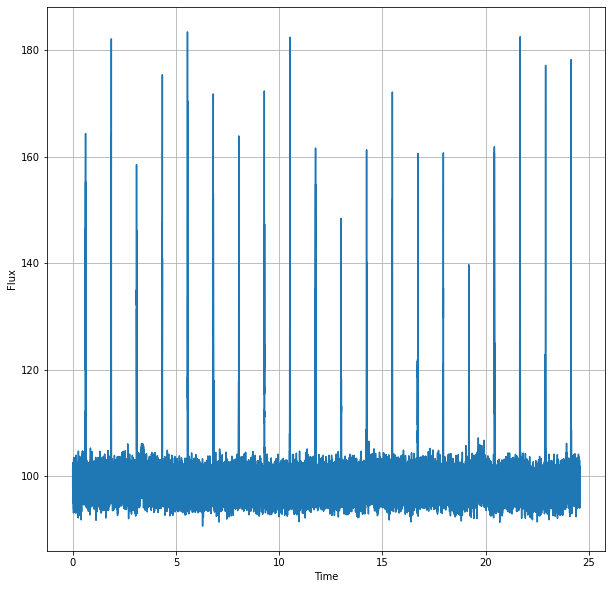

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft
from scipy.fft import rfft,rfftfreq
from scipy.optimize import curve_fit

data = np.loadtxt('pulsar_data.txt')
x = data[:100000,0]
y = data[:100000,1]
t = data[:100000,0][-1]

print(t)
plt.figure(figsize = (10,10))
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Flux")

plt.savefig("Pulsar data time series.pdf")
plt.grid()
#print(freq)
#x = np.linspace(-np.pi,np.pi,1000)
#y = np.sin(x)
#y_fft = fft(y)
#y_rfft = rfft(y)
#plt.figure()
#plt.plot(y_fft)
#plt.figure()
#plt.plot(y_rfft)

100000
4069.0511071777382


C:\Users\sheet\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


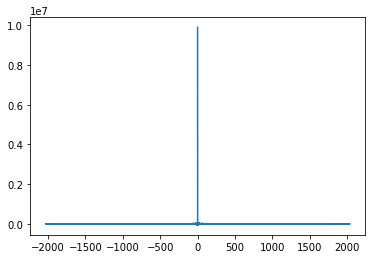

C:\Users\sheet\AppData\Local\Temp\ipykernel_52956\3812372403.py:10: RuntimeWarning: divide by zero encountered in log10
  xlog = np.log10(x_f)
C:\Users\sheet\AppData\Local\Temp\ipykernel_52956\3812372403.py:10: RuntimeWarning: invalid value encountered in log10
  xlog = np.log10(x_f)
C:\Users\sheet\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


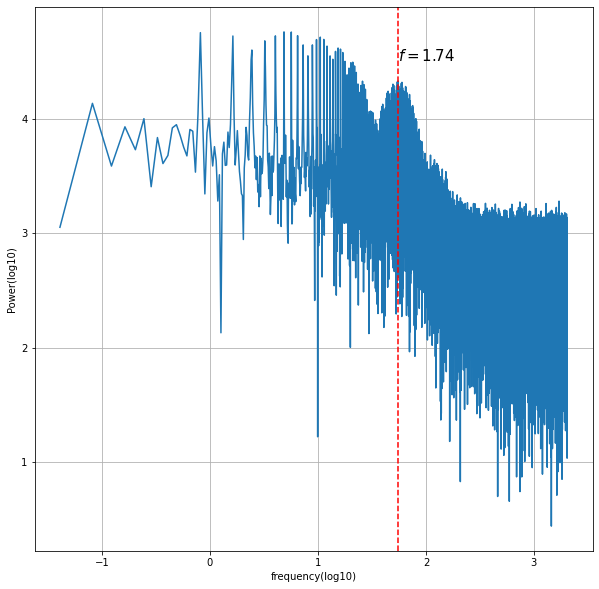

In [4]:
N = len(y)
print(N)
sample_rate = N/t
print(sample_rate)

x_f = np.fft.fftfreq(N,1/sample_rate)
y_f = np.fft.fft(y)
plt.plot(x_f,y_f)
plt.show()
xlog = np.log10(x_f)
ylog = np.log10(y_f)
#plt.figure(figsize = (7,5))
plt.figure(figsize = (10,10))
plt.plot(xlog,ylog)
plt.xlabel("frequency(log10)")
plt.ylabel("Power(log10)")
plt.axvline(x = 1.74,linestyle = '--',color='r')
plt.text(1.74,4.5,'$f = 1.74$',color ='k',size = 15)
plt.savefig("Pulsar data frequency graph.pdf")
plt.grid()

In [4]:
freq =(10)**(1.74)
print(freq)
Time_period = 1/freq
print(Time_period)

54.954087385762456
0.018197008586099832


In [5]:
index = 0
xlog = np.delete(xlog,index)
ylog = np.delete(ylog,index)
print(xlog)
print(ylog)

[-1.39050686 -1.08947686 -0.9133856  ...  3.30844578  3.30845446
  3.30846315]
[3.05137509+1.12255728j 4.13316799-0.80194115j 3.58574961-0.84122068j ...
 2.44455789+0.42012876j 2.45178526-0.83349957j 2.57717392+1.36437635j]


In [6]:
def lin(x,m,c):
    return m*x+c

def Gauss(x,a,b,c):
    return a*np.exp(-np.power(x-b,2)/(2*np.power(c,2)))


In [7]:
popt,pcov = curve_fit(lin,xlog,ylog)
#print(popt)


C:\Users\sheet\anaconda3\lib\site-packages\numpy\lib\function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


C:\Users\sheet\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


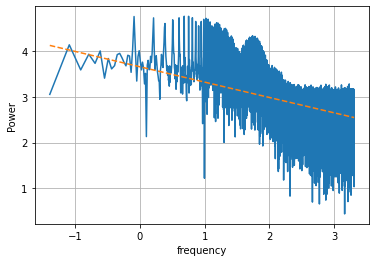

In [8]:

plt.plot(xlog,ylog)

plt.plot(xlog, (lin(xlog, *popt)),linestyle = '--')
plt.grid() 
plt.xlabel("frequency")
plt.ylabel("Power")
plt.savefig("linear fitting on pulsar data.pdf")

In [9]:
gaussian  = ylog - lin(xlog, *popt)     

In [11]:
popt1,cov1 = curve_fit(Gauss,xlog,gaussian)

C:\Users\sheet\anaconda3\lib\site-packages\numpy\lib\function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


C:\Users\sheet\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


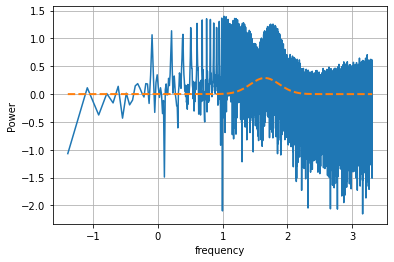

In [14]:


plt.plot(xlog,gaussian)
plt.plot(xlog, Gauss(xlog, *popt1), linestyle='--', linewidth=2,label='Fitted Gaussian Data')
plt.grid()
plt.xlabel("frequency")
plt.ylabel("Power")
plt.savefig("Gaussian fitting on pulsar data.pdf")

In [13]:
def std_dev(x, y):
    mu = (x *y).sum() / y.sum()
    return np.sqrt(np.sum((x - mu)**2 * y) / y.sum())

std = std_dev(xlog,Gauss(xlog, *popt1))

In [15]:
peak_ind = np.argmax(Gauss(xlog,*popt1))

C:\Users\sheet\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


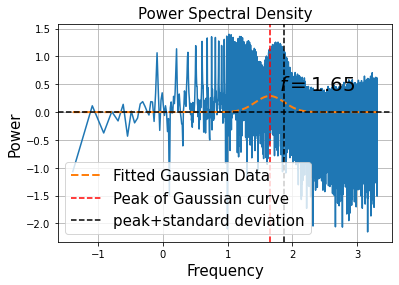

In [26]:


plt.plot(xlog,gaussian)
plt.plot(xlog, Gauss(xlog, *popt1), linestyle='--', linewidth=2,label='Fitted Gaussian Data')
plt.axvline(x=xlog[peak_ind],color='r',linestyle='--',label='Peak of Gaussian curve')
plt.axhline(y=0,color='k',linestyle='--')
plt.text(1.8,0.4,'$f = %.2f$'%xlog[peak_ind],size=20)

plt.axvline(x= xlog[peak_ind] + std,color='k',linestyle='--',label = 'peak+standard deviation')

plt.xlabel("Frequency",size=15)
plt.ylabel("Power",size=15)

plt.title("Power Spectral Density",size=15)
plt.grid()
plt.legend(prop={'size':15})
plt.savefig("Error in the Frequency plot.pdf")
